<a href="https://colab.research.google.com/github/SierraWJ/DL_From_Scratch/blob/main/DLFS1_Ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning For Scratch
# Chapter 2 신경망

## 1. 신경망
신경망의 주요한 성질은 Weight Parameter 의 적절한 값을 데이터로부터 자동으로부터 학습하는 능력을 가지고 있다는 것. 
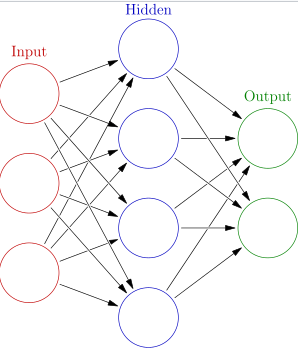  
입력층, 은닉층, 출력층으로 구성되어있음. 은닉층의 뉴런은 사람 눈에는 보이지 않는다.   
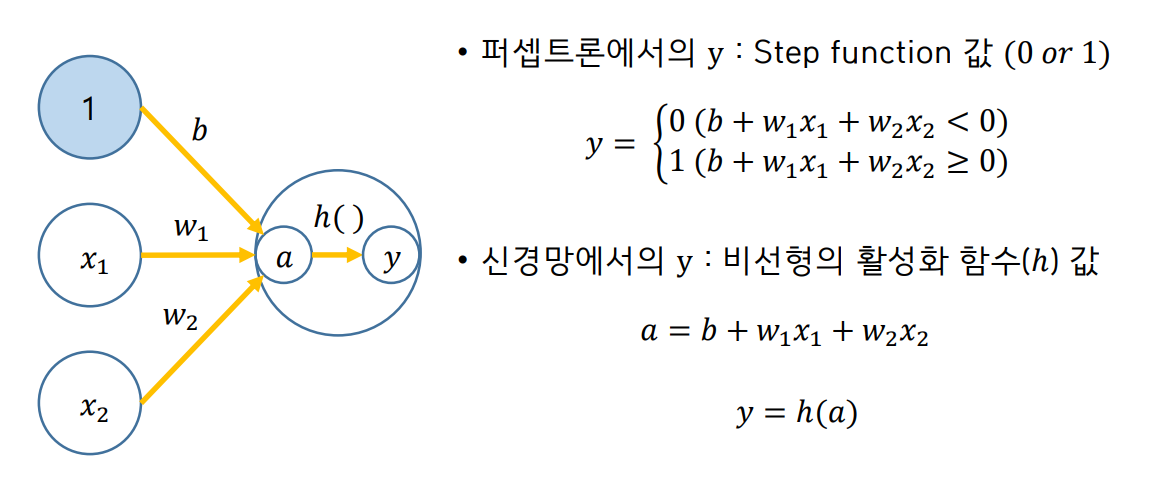  
b -> Bias : 뉴런이 얼마나 쉽게 활성화 되느냐를 제어함. w1, w2,는 각 신호의 가중치 -> 각 신호의 영향력을 제어함.   
위 사진은 Bias를 명시한 퍼셉트론  
가중치가 b, 입력이 1인 뉴런이 추가됨. 이 퍼셉트론은 x1, x2, 1이라는 3개의 신호가 뉴런에 입력되어 각 신호에 가중치를 곱한 후 다음 뉴런에 전달 됨.  
다음 뉴런에서는 이들 신호의 값을 더하여 그 합이 0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력함.  
Bias의 입력신호는 항상 1.   
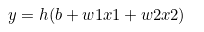  
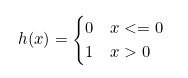


## 2. 활성화 함수
Activation Function -> 위의 식에서 볼 수 있다시피 h(x) 같이 입력 신호의 총합을 출력 신호로 변환하는 함수.  
활성화 함수는 입력 신호의 총합이 활성화를 일으키는 지를 정하는 역할을 함. 
위의 식은 아래의 2개의 식으로 나눌 수 있음.  
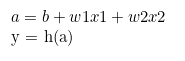  
가중치가 달린 입력 신호와 편향의 총합을 계산하고 이를 a라고 함. 그리고 a를 함수 h()에 넣어서 y를 출력함.  
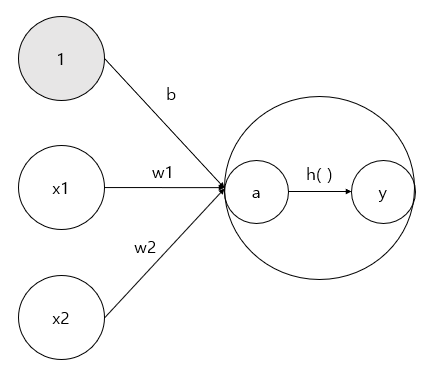  
가중치 신호를 조합한 결과가 a라는 노드가 되고 활성화 함수 h() 를 통과하여 y라는 노드로 변환되는 과정을 그림으로 표현. 


### Sigmoid Function  

#### 계단함수
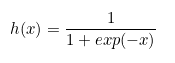  
exp(-x) => e^-x. e는 자연상수. 
계단 함수를 파이썬으로 구현하면 다음과 같다. 

In [1]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

이 구현은 단순하고 쉽지만 인수 x는 실수(부동소수점)만 받아들임. 즉 step_function(3.0)은 가능하지만 넘파이 배열을 인수로 넣을 수 는 없음. 

In [2]:
import numpy as np

def step_function(x):
    y = x > 9
    return y.astype(np.int)

넘파이의 트릭을 사용해서 해당 함수 구현

In [3]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [4]:
y = x > 0
y

array([False,  True,  True])

In [5]:
y = y.astype(np.int)
y

array([0, 1, 1])

넘파이 배열의 자료형을 반환할 때는 astype() 메서드를 사용함. 파이썬에서는 bool 을 int로 변환하면 True 는 1, False는 0으로 변환.  
앞에서 정의한 계단함수를 그래프로 그리는 과정 -> 0을 경계로 출력이 0에서 1로 바뀜.  

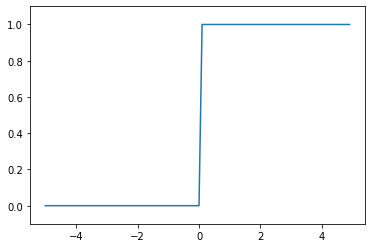

In [6]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype = np.int)

x = np.arange(-5.0,5.0,0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

#### Sigmoid 함수 구현하기

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

넘파이 브로드캐스트 기능 ->  
넘파이 배열과 스칼라값의 연산을 넘파이 배열의 원소 각각과 스칼라 값의 연산으로 바꿔 수행하는 것. 

In [9]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [10]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

그래프로 그린 시그모이드 함수

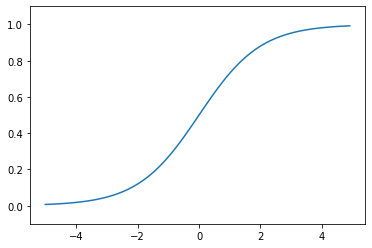

In [11]:
 x = np.arange(-5.0, 5.0, 0.1)
 y = sigmoid(x)
 plt.plot(x, y)
 plt.ylim(-0.1, 1.1)
 plt.show()

#### 시그모이드 함수와 계단 함수 비교  

- 차이점
1. 매끄러움의 차이 -> 시그모이드 함수의 매끈함이 신경망 학습에서 아주 중요한 역할을 함
2. 계단 함수가 0과 1중 하나의 값만 돌려주는 반면 시그모이드 함수는 실수를 돌려줌. 즉 퍼셉트론에서는 뉴런 사이에 0 혹은 1이 흘렀다면 신경망에서는 연속적인 실수가 흐름.
- 공통점
1. 같은 모양을 하고있음. 둘 다 입력이 작을 때의 출력은 0에 가깝고 입력이 커지면 출력이1에 가까워지는 구조. 
2. 아무리 입력이 작거나 커도 출력은 0에서 1사이
3. 비선형 함수 

#### 비선형 함수

함수 -> 어떤 값을 입력하면 그에 따른 값을 돌려주는 변환기.  
이 변환기에 무언가 입력했을 때 출력이 입력의 상수배 만큼 변하는 함수를 선형함수.  
f(x) = ax + b (a, b 는 상수)  
비선형 함수는 문자 그대로 선형이 아닌 함수. 즉 직선 1개로는 그릴 수 없는 함수. 

신경망에서는 활성화 함수로 비선형 함수를 사용해야 함. 즉 선형 함수를 사용해서 는 안됌.  
선형 함수를 사용하면 신경망의 층을 깊게 하는 의미가 없어짐. 
무슨 의미나면 층을 아무리 깊게 해도 은닉층이 없는 네트워크로도 똑같은 기능을 할 수 있게 되기 때문.  
ex)-> h(x) = cx를 활성화 함수로 사용한 3층 네트워크.  
y(x) = h(h(h(x))) -> y(x) = c * c * c * x 처럼 세 번의 곱셈을 처리하지만 실은 y(x) = ax와 똑같은 식이 되어버림.  
즉 은닉층이 없는 네트워크로 표현할 수 있음. 

#### ReLU 함수

ReLU : Rectified Linear Unit  
입력이 0을 넘으면 그 입력을 그대로 출력하고 0 이하이면 0을 출력하는 함수.  
최근에는 시그모이드 대신 ReLU를 활성화 함수로 많이 사용함.  
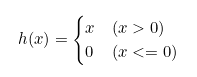  



In [12]:
def relu(x):
    return np.maximum(0,x)
#np.maxmimum : 두 입력 중 큰 값을 반환하는 함수

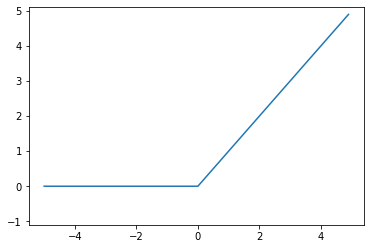

In [13]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.1, 5.1) # y축의 범위 지정
plt.show()

#### 다차원 배열의 계산

##### 다차원 배열


기본적으로 다차원 배열 또한 숫자의 집합. 숫자를 한줄이나 직사각형이나 3차원이나 N차원으로 나열해뒀을 뿐. 

In [14]:
import numpy as np
A = np.array([1,2,3,4])
print(A)
np.ndim(A)

[1 2 3 4]


1

패열의 차원 수는 np.dim() 함수로 확인 가능

In [15]:
A.shape

(4,)

배열의 형상은 인스턴스 변수인 shape로 확인 가능

In [16]:
A.shape[0]

4

In [17]:
B = np.array([[1,2],[3,4],[5,6]])
print(B)
np.ndim(B)

[[1 2]
 [3 4]
 [5 6]]


2

In [18]:
B.shape

(3, 2)

행렬 내적 계산 -> 행렬 곱  
고등학교 시간에 충분히 공부해봤을 것이라 생각함. 쓸데없는 설명은 생략한다. 

In [19]:
A = np.array([[1,2],[3,4]])
print(A.shape)
B = np.array([[5,6],[7,8]])
print(B.shape)
np.dot(A,B)

(2, 2)
(2, 2)


array([[19, 22],
       [43, 50]])

형상이 다른 행렬의 내적또한 당연히 계산 가능. 2X3 * 3X2 행렬 계산하는 예제

In [20]:
A = np.array([[1,2,3],[4,5,6]])
print(A.shape)
B = np.array([[1,2],[3,4],[5,6]])
print(B.shape)
np.dot(A,B)

(2, 3)
(3, 2)


array([[22, 28],
       [49, 64]])

신경망의 내적-> 넘파이 행렬을 통해 신경망을 구현  
행렬의 곱으로 신경망의 게산을 수행함.  
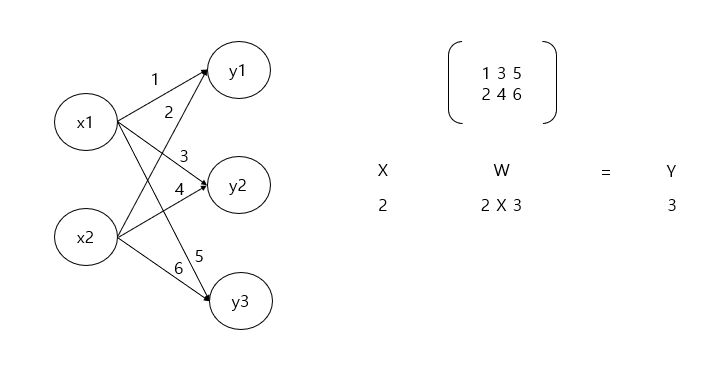

In [21]:
X = np.array([1,2])
print(X.shape)
W = np.array([[1,3,5],[2,4,6]])
print(W)
print(W.shape)
Y = np.dot(X,W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


#### 3층 신경망 구현하기  
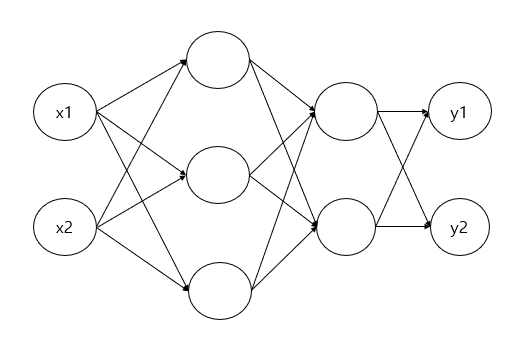  
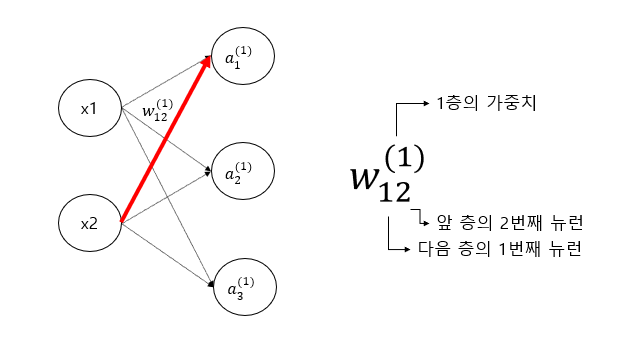


##### 각 층의 신호 전달 구현하기

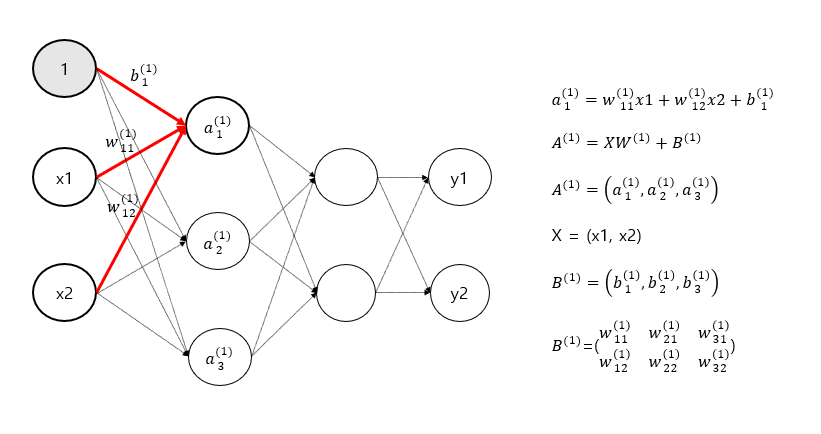

In [22]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
A1

(2, 3)
(2,)
(3,)


array([0.3, 0.7, 1.1])

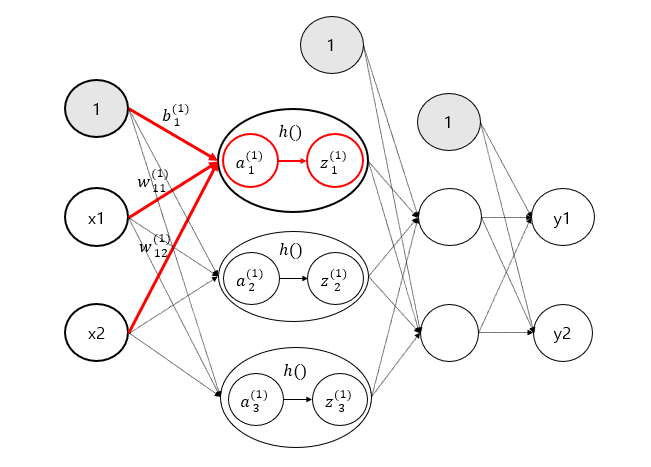

In [23]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


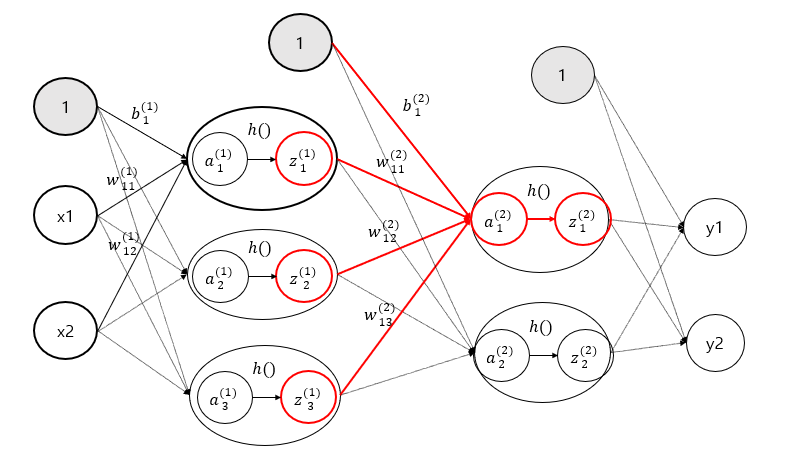

In [24]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


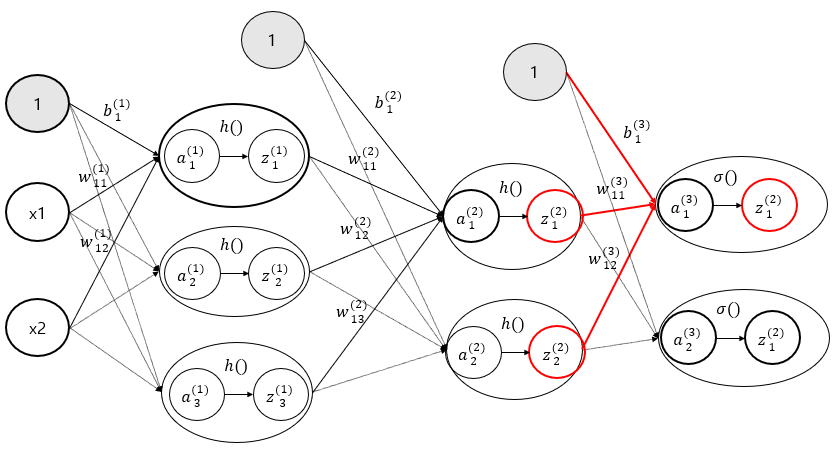

In [25]:
def identity_function(x):
    return x

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(A3)
print(Y) # Y = A3

[0.31682708 0.69627909]
[0.31682708 0.69627909]


#### 구현 정리

In [26]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'],network['W2'],network['W3']
    b1, b2, b3 = network['b1'],network['b2'],network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0,0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


#### 출력층 설계하기

##### 항등함수와 소프트맥스 함수 구현하기 

항등함수 : 입력을 그대로 출력하는 함수.  
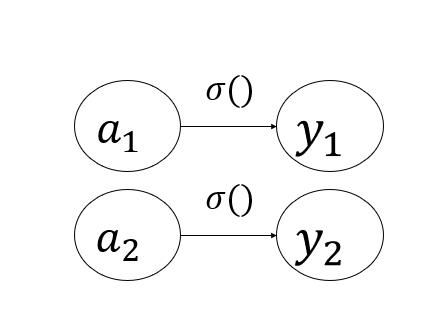  
소프트맥스 함수  
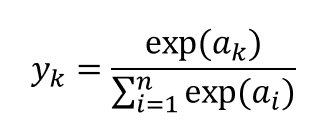  
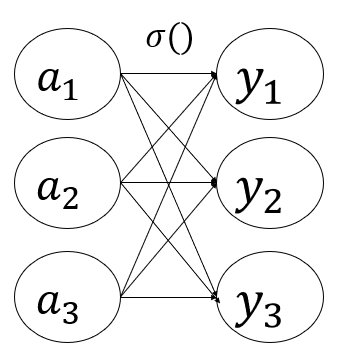

In [27]:
a = np.array([0.3,2.9,4.0])

exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


##### 소프트맥스 함수 구현 시 주의사항

컴퓨터로 계산하게 될 때 오버플로우 문제를 조심해야 함. -> 지수 함수는 쉽게 큰 값을 내뱉을 수 있다.  
그리고 큰 값끼리 나눗셈을 하면 결과 수치가 불안정 해 진다. 개선한 수식은 다음과 같다.  
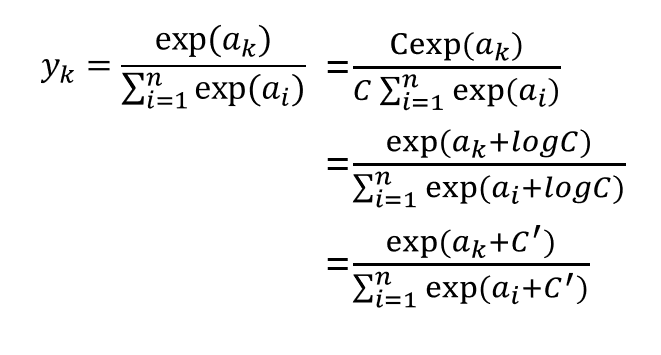

In [28]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))
#제대로 계산 되지 않는다. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

In [29]:
c = np.max(a) # c = 1010 (최댓값)
a - c

array([  0, -10, -20])

In [30]:
np.exp(a-c)/np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [31]:
def softmax(a):
    C = np.max(a)
    exp_a - np.exp(a-c) #오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

##### 소프트맥스 함수의 특징

In [32]:
a = np.array([0.3,2.9,4.0])
y = softmax(a)
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

소프트맥스 함수의 출력은 0과 1.0 사이의 실수. 소프트맥스 함수 출력의 총 합은 1  
이 성질 덕분에 소프트맥스 함수의 출력을 확률로 해석할 수 있음. 
소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않음. 
신경망의 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식함.  
결과적으로 신경망으로 분류할 때는 출력층의 소프트맥스 함수를 생략해도 됨. 

##### 출력층의 뉴런 수 정하기

풀려는 문제에 맞게 적절히 정해야 함. 분류에서는 분류하고 싶은 클래스 수로 정하는 것이 일반적.  
예를 들어 입력 이미지를 숫자 0부터 9 중 하나로 분류하는 문제라면 출력 층의 뉴런을 10개로 정해야 함. 

#### 손글씨 숫자 인식

##### MNIST 데이터셋

추론과정 => 신경망의 순전파 (foward progagation)

MNIST 이미지 데이터를 불러온 후 각 데이터의 형상 출력

In [34]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


원-핫 인코딩 -> 정답을 뜻한느 원소 1(hot) 나머지는 0으로 처리하는 배열로 인코딩  

5
(784,)
(28, 28)


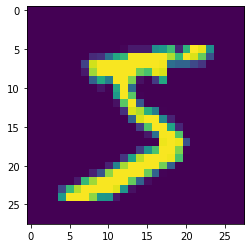

In [35]:
%matplotlib inline
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    #pil_img.show()
    plt.imshow(np.array(pil_img))
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]

print(label) # 5

print(img.shape)          # (784,)
img = img.reshape(28, 28) # 원래 이미지의 모양으로 변형
print(img.shape)          # (28, 28)

img_show(img)

In [39]:
import sys, os
import pickle
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax

pickle -> 프로그램 실행 중에 특정 객체를 파일로 저장하는 기능. 저장해 둔 Pickle 파일을 로드하면 실행 당시의 객체를 즉시 복원할 수 있음.  

In [40]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label = False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [41]:
x, t = get_data()
network = init_network()

In [42]:
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)  # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy:" + str(float(accuracy_cnt)/len(x)))

Accuracy:0.9352


In [43]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

x.shape

(10000, 784)

In [44]:
x[0].shape

(784,)

In [ ]:
W1.shape

In [46]:
W2.shape

(50, 100)

In [47]:
W3.shape

(100, 10)

In [48]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [49]:
list( range(0, 10) )

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [50]:
list( range(0, 10, 3) )

[0, 3, 6, 9]

In [51]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)
y

array([1, 2, 1, 0])

In [52]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y==t)
np.sum(y==t)

[ True  True False  True]


3